### MNIST classification using ANNs in Keras

In [1]:
from keras.datasets import mnist
from keras.layers import Dense,Dropout
from keras.models import Sequential
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

(x_train,y_train),(x_test,y_test) = mnist.load_data()

C:\Users\Victor\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


Text(0.5,1,'Digit is: 5')

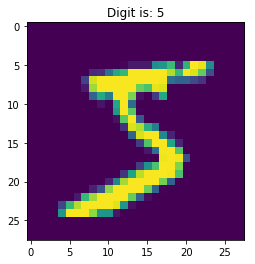

In [3]:
#Visualize data
plt.imshow(x_train[0])
plt.title('Digit is: {}'.format(y_train[0]))

#### Prepare data

In [4]:
x_train = x_train.reshape((60000),x_train.shape[1]**2)
x_test = x_test.reshape((10000),x_test.shape[1]**2)

x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255

#Labels need to be converted to categorical
from keras.utils import to_categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

#### Create model 

In [5]:
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(784, )))
model.add(Dense(10, activation='softmax'))

#Compilation step
model.compile(optimizer='adam',
             loss = 'categorical_crossentropy',
             metrics=['accuracy'])

#### Train model

In [6]:
model.fit(x_train, y_train, epochs=10, batch_size=128)

Epoch 1/10
60000/60000 [==============================] - 5s 92us/step - loss: 0.2689 - acc: 0.9251
Epoch 2/10
60000/60000 [==============================] - 5s 90us/step - loss: 0.1090 - acc: 0.9682
Epoch 3/10
60000/60000 [==============================] - 6s 99us/step - loss: 0.0711 - acc: 0.9794
Epoch 4/10
60000/60000 [==============================] - 6s 93us/step - loss: 0.0510 - acc: 0.9849
Epoch 5/10
60000/60000 [==============================] - 6s 93us/step - loss: 0.0367 - acc: 0.9890
Epoch 6/10
60000/60000 [==============================] - 6s 102us/step - loss: 0.0275 - acc: 0.9921
Epoch 7/10
60000/60000 [==============================] - 6s 107us/step - loss: 0.0203 - acc: 0.9948
Epoch 8/10
60000/60000 [==============================] - 6s 101us/step - loss: 0.0152 - acc: 0.9960
Epoch 9/10
60000/60000 [==============================] - 6s 94us/step - loss: 0.0122 - acc: 0.9970
Epoch 10/10
60000/60000 [==============================] - 6s 94us/step - loss: 0.0098 - acc: 0.9

#### Test model

In [7]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print('Test accuracy: {} \nTest loss {}'.format(test_accuracy, test_loss))

10000/10000 [==============================] - 1s 61us/step
Test accuracy: 0.9822 
Test loss 0.06234070780656766


#### Training same model using Pytorch 

In [8]:
import torch.nn as nn
import torch
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from torch.autograd import Variable
from torch.utils.data import DataLoader

In [9]:
# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

#### Prepare data

In [10]:
all_transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.1307,), (0.3081,))]) #transforms to apply

train_data = datasets.MNIST('data/', train=True, transform=all_transform, download=True)
test_data = datasets.MNIST('data/', train=False, transform=all_transform, download=True)

train_loader = DataLoader(train_data, batch_size=128,shuffle=True)
test_loader = DataLoader(test_data, batch_size=128, shuffle=False)

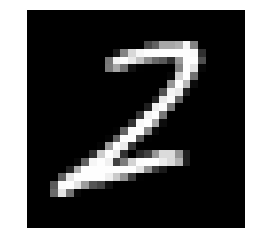

In [11]:
#Visualize data
def plot_image(img):
    img = img.numpy()[0]
    mean = 0.1307 #mean of the mnist dataset
    std = 0.3081 #standard deviation of the dataset
    img = ((mean*img) + std) #recover original image
    plt.imshow(img, cmap='gray')
    plt.axis('off')

sample_data = next(iter(train_loader)) 
plot_image(sample_data[0][5])

#### Create model

In [12]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(784, 512) 
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(512, 10)  
    
    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        return out

model = Net().to(device)

In [13]:
#Set loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

#### Train model 

In [14]:
no_epochs = 10
steps = len(train_loader)
for epoch in range(no_epochs):
    for i,(images,labels) in enumerate(train_loader):
        images = images.reshape(-1,28*28).to(device)
        labels = labels.to(device)
        
        #Forward pass
        outputs = model(images)
        loss = criterion(outputs,labels)
        
        #Backward propagation and optimize
        optimizer.zero_grad() #initiliaze gradients
        loss.backward() #perform backward propagation
        optimizer.step()
        
        if(i+1) % 128 == 0:
            print('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}'
                  .format(epoch+1, no_epochs, i+1, steps, loss.item()))

Epoch [1/10], Step [128/469], Loss: 0.2189
Epoch [1/10], Step [256/469], Loss: 0.1027
Epoch [1/10], Step [384/469], Loss: 0.1395
Epoch [2/10], Step [128/469], Loss: 0.0446
Epoch [2/10], Step [256/469], Loss: 0.0847
Epoch [2/10], Step [384/469], Loss: 0.0373
Epoch [3/10], Step [128/469], Loss: 0.0192
Epoch [3/10], Step [256/469], Loss: 0.0156
Epoch [3/10], Step [384/469], Loss: 0.1187
Epoch [4/10], Step [128/469], Loss: 0.0151
Epoch [4/10], Step [256/469], Loss: 0.0738
Epoch [4/10], Step [384/469], Loss: 0.0564
Epoch [5/10], Step [128/469], Loss: 0.0521
Epoch [5/10], Step [256/469], Loss: 0.0138
Epoch [5/10], Step [384/469], Loss: 0.0316
Epoch [6/10], Step [128/469], Loss: 0.0161
Epoch [6/10], Step [256/469], Loss: 0.0108
Epoch [6/10], Step [384/469], Loss: 0.0151
Epoch [7/10], Step [128/469], Loss: 0.0045
Epoch [7/10], Step [256/469], Loss: 0.0119
Epoch [7/10], Step [384/469], Loss: 0.0732
Epoch [8/10], Step [128/469], Loss: 0.0010
Epoch [8/10], Step [256/469], Loss: 0.0085
Epoch [8/10

#### Test model 

In [15]:
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in test_loader:
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    print('Accuracy of the network on the 10000 test images: {} %'.format(100 * correct / total))

# Save the model checkpoint
torch.save(model.state_dict(), 'model.ckpt')

Accuracy of the network on the 10000 test images: 97.96 %
